<a href="https://colab.research.google.com/github/akhileshmanukonda/bert-model/blob/main/reasearch_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research and analysis of a Bert pretrained model**
bert means

In [ ]:
pip install transformers

In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from transformers import pipeline
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

model_name = "bert-base-cased"
# Use AutoModelForSequenceClassification for text classification tasks
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

classifier(
    [
        "jake broke the vase",

    ]
)
sequences = [
    "jake broke the vase\n\nThe vise. This is really a great idea for the Vise\
    I have tried to create and I'm really hoping to see it being incorporated into the Vise."]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

batch["labels"] = torch.tensor([1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
generator = pipeline("text-generation")
generator("jake broke the vase")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'jake broke the vase. The vase was broken in by a small piece of metal (see below). No damage was done.\n\n\nThe Vase was very likely broken at that time. A local doctor, who said she saw a'}]

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
#load dataset
from datasets import load_dataset

ds = load_dataset("liuyanchen1015/MULTI_VALUE_mrpc_for_to")
print (ds)


from datasets import load_dataset

# Load the dataset
dataset = load_dataset("liuyanchen1015/MULTI_VALUE_mrpc_for_to")

# Convert to pandas DataFrame for easier manipulation
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1106 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/134 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/514 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 1106
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 134
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 514
    })
})


In [ ]:
# Display the first few rows of the training set
print(train_df.head())

# Display basic information about the training set
print(train_df.info())

# Check for missing values
print(train_df.isnull().sum())


                                           sentence1  \
0  Around 0335 GMT , Tab shares were up 19 cents ...   
1  The stock rose $ 2.11 , or about 11 percent , ...   
2  Legislation making it harder for consumers for...   
3  He told The Sun newspaper that Mr. Hussein 's ...   
4  Gyorgy Heizler , head of the local disaster un...   

                                           sentence2  label  idx  value_score  
0  Tab shares jumped 20 cents , or 4.6 % , for to...      0    3            1  
1  PG & E Corp. shares jumped $ 1.63 or 8 percent...      1    4            1  
2  Legislation making it harder for consumers for...      0   11            2  
3  " Saddam 's daughters had British schools and ...      1   14            2  
4  The head of the local disaster unit , Gyorgy H...      0   15            1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  --

In [ ]:
# Get descriptive statistics for the dataset
print(train_df.describe())

# Check the distribution of the labels
print(train_df['label'].value_counts())


             label          idx  value_score
count  1106.000000  1106.000000  1106.000000
mean      0.716094  1993.498192     1.847197
std       0.451096  1157.622656     0.858904
min       0.000000     3.000000     1.000000
25%       0.000000  1027.500000     1.000000
50%       1.000000  1942.500000     2.000000
75%       1.000000  2977.500000     2.000000
max       1.000000  4073.000000     6.000000
label
1    792
0    314
Name: count, dtype: int64


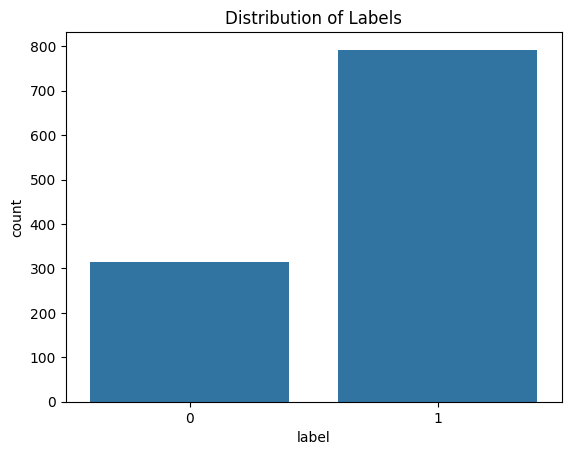

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the labels
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Labels')
plt.show()


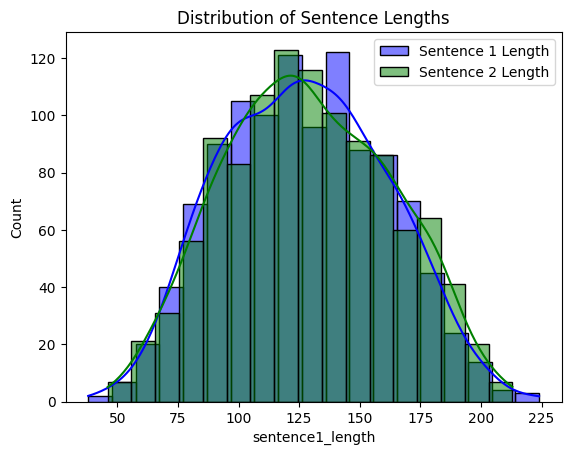

In [ ]:
# Calculate the length of each sentence
train_df['sentence1_length'] = train_df['sentence1'].apply(len)
train_df['sentence2_length'] = train_df['sentence2'].apply(len)

# Plot the distribution of sentence lengths
sns.histplot(train_df['sentence1_length'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_length'], kde=True, color='green', label='Sentence 2 Length')
plt.legend()
plt.title('Distribution of Sentence Lengths')
plt.show()


In [ ]:
# Check for duplicate rows
duplicates = train_df.duplicated(subset=['sentence1', 'sentence2']).sum()
print(f"Number of duplicate sentence pairs: {duplicates}")


Number of duplicate sentence pairs: 0


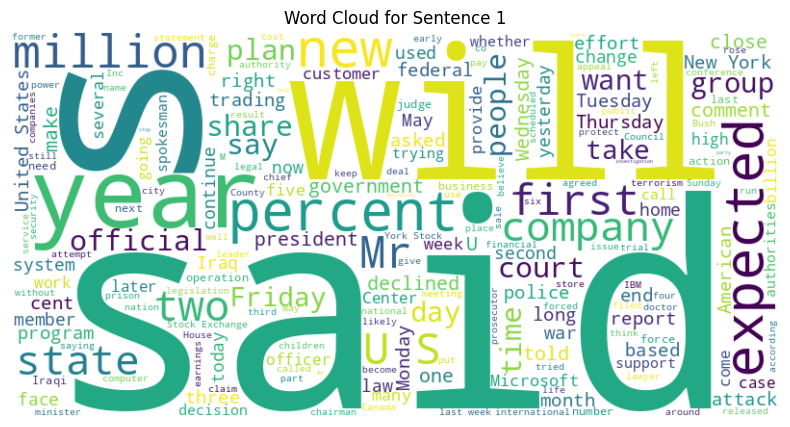

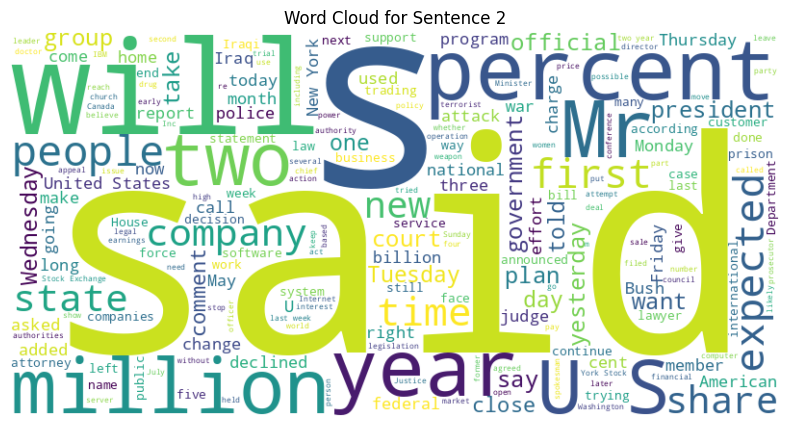

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for the first sentences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['sentence1']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentence 1')
plt.show()

# Generate a word cloud for the second sentences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['sentence2']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentence 2')
plt.show()



In [ ]:
train_set = ds["train"]
train_set[0]


train_set.features

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# Access the correct columns within the train_set Dataset
tokenized_sentences_1 = tokenizer(train_set["sentence1"])
tokenized_sentences_2 = tokenizer(train_set["sentence2"])

In [ ]:
inputs = tokenizer('Around 0335 GMT , Tab shares was up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .',
 'Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .')
inputs

In [ ]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

In [ ]:
tokenized_dataset = tokenizer(
    train_set["sentence1"],
    train_set["sentence2"],
    padding=True,
    truncation=True,
)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [ ]:
tokenized_datasets = train_set.map(tokenize_function, batched=True)
tokenized_datasets

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")


model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

In [ ]:
# Assuming 'train_set' is your entire dataset, split it first
from datasets import DatasetDict

# Adjust split ratio as needed
train_testvalid = train_set.train_test_split(test_size=0.2)
train_valid = train_testvalid['test'].train_test_split(test_size=0.5)

# Create a DatasetDict
tokenized_datasets = DatasetDict({
    'train': train_testvalid['train'],
    'validation': train_valid['test'],
    'test': train_valid['train']
})

# Apply tokenization
tokenized_datasets = tokenized_datasets.map(tokenize_function, batched=True)
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
trainer.train()

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

In [ ]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
pip install evaluate

In [ ]:
import evaluate

metric = evaluate.load("f1")
metric.compute(predictions=preds, references=predictions.label_ids)